In [1]:
import pandas as pd
import pymc as pm
import numpy as np

df = pd.read_csv("sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
median_income = df['median_income'].values
housing_median_age = df['housing_median_age'].values
median_house_value = df['median_house_value'].values
population = df['population'].values

In [3]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.crs = "EPSG:4326" #CRS = Coordinate Reference System


In [4]:
!pip install lets_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 30.7 MB/s eta 0:00:00


In [5]:
from lets_plot import *

data = {'lon': gdf.geometry.x, 'lat': gdf.geometry.y, 'value': gdf['median_income']}

p = ggplot(data) + \
    geom_livemap() + \
    geom_point(aes(x='lon', y='lat', size='value', color='value'), alpha=0.5) + \
    scale_color_gradient(low='blue', high='red') + \
    ggtitle('California median house value')

p.show()



In [6]:
from sklearn.preprocessing import StandardScaler

features = df[['latitude', 'longitude', 'median_income']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

array([[-0.67152023,  2.619365  , -1.25254316],
       [-0.57326437,  2.53956878, -1.08148298],
       [-0.90546278,  2.4946834 , -1.17010515],
       ...,
       [ 2.90780067, -2.36291168, -0.44666313],
       [ 2.88908527, -2.36291168, -0.99778717],
       [ 2.29955006, -2.387848  , -0.45536288]])

In [11]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df['cluster'] = clusters
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,4
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,4
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,4
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,4


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.crs = "EPSG:4326"
data = {'lon': gdf.geometry.x, 'lat': gdf.geometry.y, 'value': gdf['cluster']}

colors = {0:'black', 1:'blue', 2:'green', 3:'red', 4:'yellow'}

p = ggplot(data) + \
    geom_livemap() + \
    geom_point(aes(x='lon', y='lat', size='value', color='value'), alpha=0.5) + \
    scale_color_manual(values=colors) + \
    ggtitle('California median house value')

p.show()

In [13]:
cluster = df['cluster']
with pm.Model() as hierarchical_model:
    b_income = pm.Normal('b_income', mu=0, sigma=10)
    b_age = pm.Normal('b_age', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    a = pm.Normal('a', mu=0, sigma=10, shape=5)

    mu = a[cluster] + b_income * median_income + b_age * housing_median_age

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=median_house_value)


In [ ]:
with hierarchical_model:
  trace = pm.sample()

In [ ]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_income,3218.392,9.821,3199.792,3236.298,0.187,0.133,2759.0,1604.0,1.00
b_age,5330.823,3.216,5324.731,5336.853,0.060,0.042,2920.0,1588.0,1.00
a[0],-5.645,10.098,-23.065,14.201,0.193,0.210,2743.0,1468.0,1.00
a[1],171.105,10.011,152.324,189.385,0.181,0.128,3054.0,1270.0,1.00
a[2],236.356,10.026,217.359,254.857,0.178,0.126,3170.0,1549.0,1.00
a[3],85.280,9.880,66.578,104.091,0.171,0.124,3307.0,1423.0,1.01
a[4],-61.574,10.052,-80.098,-42.185,0.167,0.118,3649.0,1717.0,1.01
sigma,13011.242,5.061,13001.927,13020.923,0.093,0.066,2959.0,1514.0,1.00


In [10]:
import arviz as az

array([[<Axes: title={'center': 'b_income'}>,
        <Axes: title={'center': 'b_income'}>],
       [<Axes: title={'center': 'b_age'}>,
        <Axes: title={'center': 'b_age'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

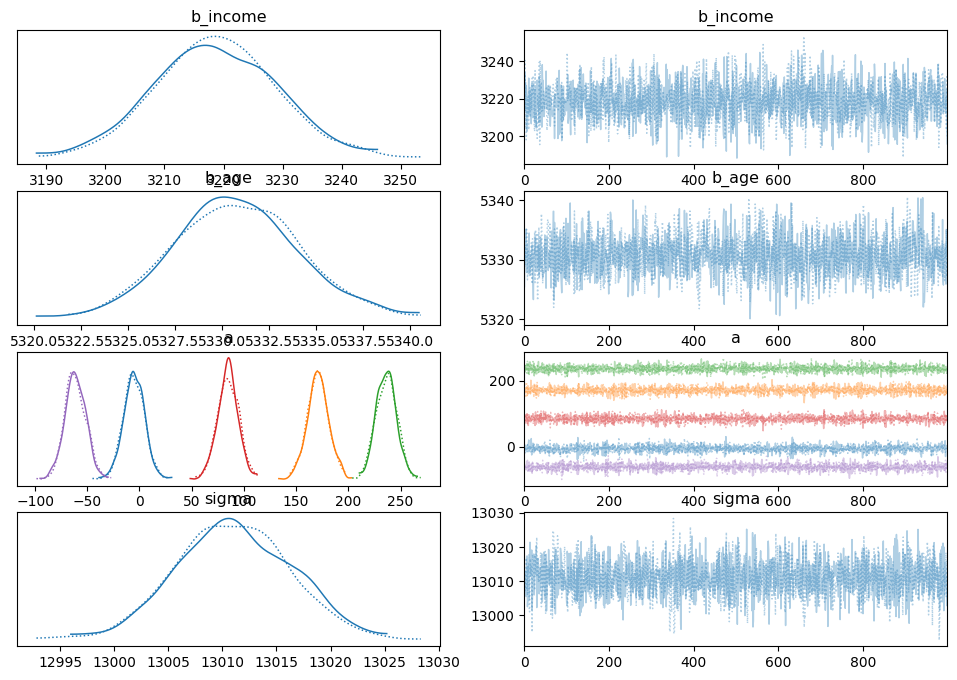

In [ ]:
az.plot_trace(trace)

In [ ]:
with hierarchical_model:
  trace_hm = pm.sample_posterior_predictive(trace)

In [9]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: xlabel='Y_obs / Y_obs'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


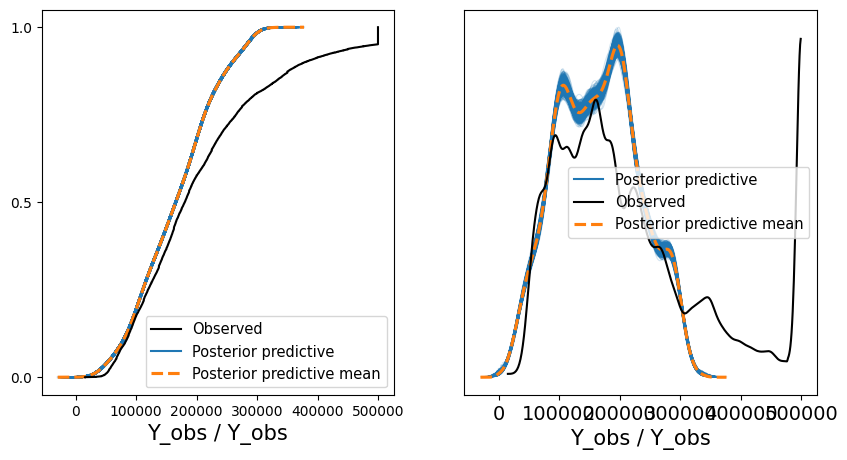

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_hm, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_hm, group='posterior', ax=axes[1])

In [ ]:
with pm.Model() as hierarchical_model_2:
    b_income = pm.Normal('b_income', mu=0, sigma=10, shape=5)
    b_age = pm.Normal('b_age', mu=0, sigma=10, shape=5)
    sigma = pm.HalfNormal('sigma', sigma=10)

    a = pm.Normal('a', mu=0, sigma=10, shape=5)

    mu = a[cluster] + b_income[cluster] * median_income + b_age[cluster] * housing_median_age

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=median_house_value)

In [ ]:
with hierarchical_model_2:
  trace_2 = pm.sample()

In [ ]:
pm.summary(trace_2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_income[0],523.081,10.356,503.918,542.595,0.153,0.109,4525.0,1180.0,1.00
b_income[1],1119.337,9.640,1100.277,1137.113,0.130,0.092,5511.0,1527.0,1.00
b_income[2],1334.050,10.166,1316.311,1354.652,0.144,0.102,4921.0,1512.0,1.00
b_income[3],1054.474,10.000,1035.494,1072.976,0.140,0.099,5172.0,1326.0,1.00
b_income[4],420.361,9.930,402.559,439.404,0.144,0.102,4688.0,1603.0,1.00
b_age[0],3701.608,5.252,3692.498,3711.989,0.075,0.053,4990.0,1488.0,1.00
b_age[1],4738.108,7.262,4724.210,4752.133,0.108,0.076,4501.0,1447.0,1.00
b_age[2],5270.405,6.556,5258.640,5283.236,0.100,0.071,4306.0,1660.0,1.00
b_age[3],2707.549,9.052,2690.432,2724.610,0.126,0.089,5138.0,1382.0,1.01
b_age[4],3071.312,5.229,3061.749,3081.233,0.076,0.053,4717.0,1473.0,1.00


array([[<Axes: title={'center': 'b_income'}>,
        <Axes: title={'center': 'b_income'}>],
       [<Axes: title={'center': 'b_age'}>,
        <Axes: title={'center': 'b_age'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

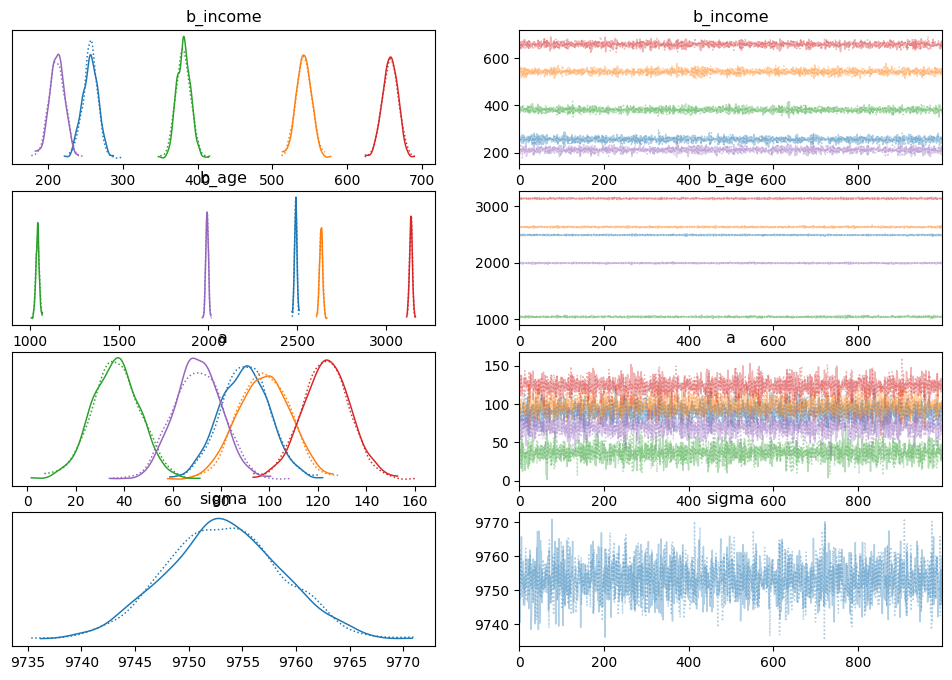

In [ ]:
az.plot_trace(trace_2)

In [ ]:
with hierarchical_model_2:
  trace_hm_2 = pm.sample_posterior_predictive(trace_2)

array([<Axes: xlabel='Y_obs / Y_obs'>], dtype=object)

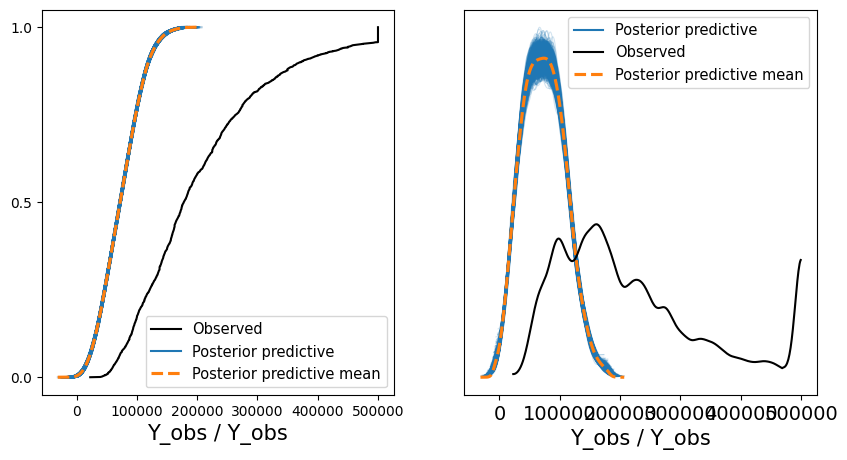

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_hm_2, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_hm_2, group='posterior', ax=axes[1])

In [ ]:
with pm.Model() as hierarchical_model_3:
    b_income = pm.Normal('b_income', mu=0, sigma=10)
    b_age = pm.Normal('b_age', mu=0, sigma=10)
    b_pop = pm.Normal('b_pop', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    a = pm.Normal('a', mu=0, sigma=10, shape=5)

    mu = a[cluster] + b_income * median_income + b_age * housing_median_age + b_pop*population

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=median_house_value)

In [ ]:
with hierarchical_model_3:
    trace_3 = pm.sample()

In [ ]:
pm.summary(trace_3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_income,2660.605,9.868,2642.246,2678.802,0.181,0.128,2963.0,1602.0,1.00
b_age,4119.607,3.863,4112.847,4127.202,0.077,0.055,2502.0,1556.0,1.00
b_pop,37.810,0.067,37.673,37.925,0.001,0.001,2560.0,1514.0,1.00
a[0],-81.838,10.376,-100.333,-61.296,0.166,0.122,3926.0,1236.0,1.00
a[1],154.327,9.963,137.307,173.409,0.179,0.127,3102.0,1450.0,1.00
a[2],196.803,10.508,176.187,215.750,0.198,0.141,2827.0,1554.0,1.00
a[3],86.693,10.133,67.564,105.259,0.180,0.128,3189.0,1504.0,1.00
a[4],-90.976,10.073,-108.866,-73.252,0.205,0.145,2434.0,1599.0,1.01
sigma,12697.854,5.113,12688.394,12706.745,0.093,0.066,2995.0,1624.0,1.00


In [ ]:
with hierarchical_model_3:
  trace_hm_3 = pm.sample_posterior_predictive(trace_3)

array([<Axes: xlabel='Y_obs / Y_obs'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


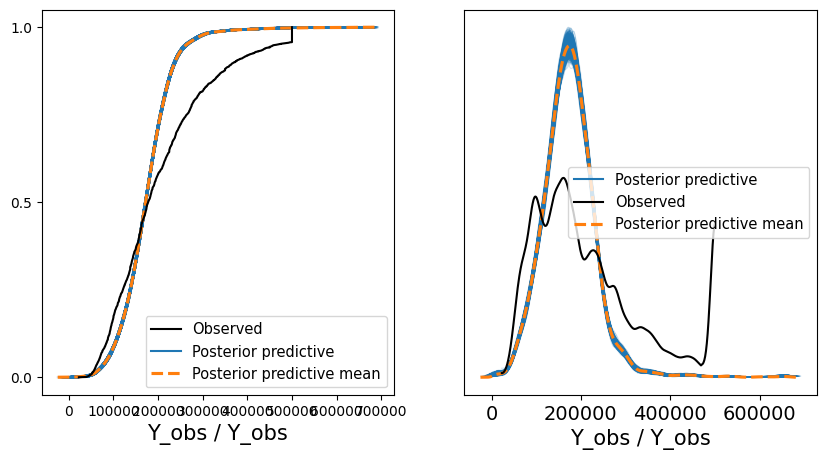

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_hm_3, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_hm_3, group='posterior', ax=axes[1])

In [18]:
with pm.Model() as hierarchical_model_4:
    m_i = pm.MutableData("m_i",median_income)
    a_i = pm.MutableData("a_i",housing_median_age)
    p_i = pm.MutableData("p_i",population)
    c = pm.MutableData("cluster",cluster)
    y = pm.MutableData("y",median_house_value)

    b_income = pm.Normal('b_income', mu=0, sigma=10, shape=5)
    b_age = pm.Normal('b_age', mu=0, sigma=10, shape=5)
    b_pop = pm.Normal('b_pop', mu=0, sigma=10, shape=5)
    sigma = pm.HalfNormal('sigma', sigma=10)

    a = pm.Normal('a', mu=0, sigma=10, shape=5)

    mu = a[c] + b_income[c] * m_i + b_age[c] * a_i + b_pop[c] * p_i

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

In [19]:
with hierarchical_model_4:
  trace_4 = pm.sample()

In [109]:
pm.summary(trace_4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_income[0],358.157,9.790,339.251,376.062,0.190,0.134,2647.0,1392.0,1.0
b_income[1],653.845,10.246,633.162,671.608,0.196,0.139,2783.0,1279.0,1.0
b_income[2],884.735,9.966,866.757,902.949,0.192,0.136,2727.0,1510.0,1.0
b_income[3],592.146,9.647,574.860,611.116,0.174,0.123,3074.0,1454.0,1.0
b_income[4],281.191,10.364,261.026,300.390,0.187,0.132,3255.0,1220.0,1.0
b_age[0],2595.772,5.856,2585.484,2606.951,0.128,0.091,2099.0,1547.0,1.0
b_age[1],3288.057,7.725,3274.108,3302.568,0.173,0.122,1989.0,1604.0,1.0
b_age[2],4071.890,6.659,4059.316,4084.304,0.134,0.095,2497.0,1509.0,1.0
b_age[3],1712.420,9.456,1694.202,1729.333,0.184,0.130,2704.0,1265.0,1.0
b_age[4],2209.354,5.916,2198.760,2220.918,0.133,0.094,1979.0,1583.0,1.0


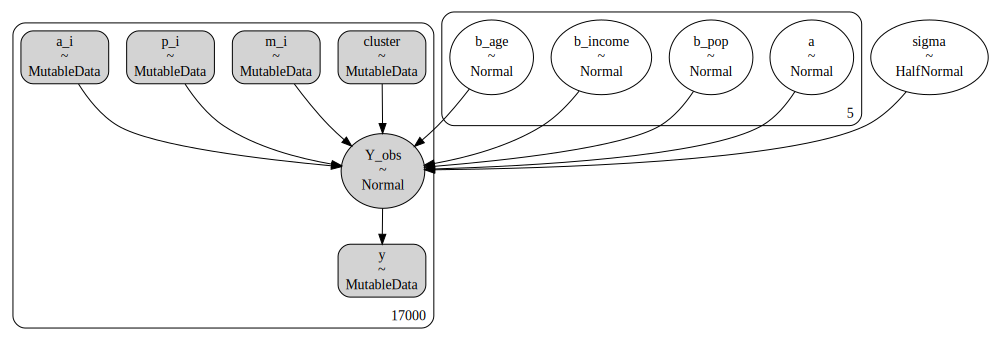

In [20]:
pm.model_to_graphviz(hierarchical_model_4)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'b_income'}>,
        <Axes: title={'center': 'b_income'}>],
       [<Axes: title={'center': 'b_age'}>,
        <Axes: title={'center': 'b_age'}>],
       [<Axes: title={'center': 'b_pop'}>,
        <Axes: title={'center': 'b_pop'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

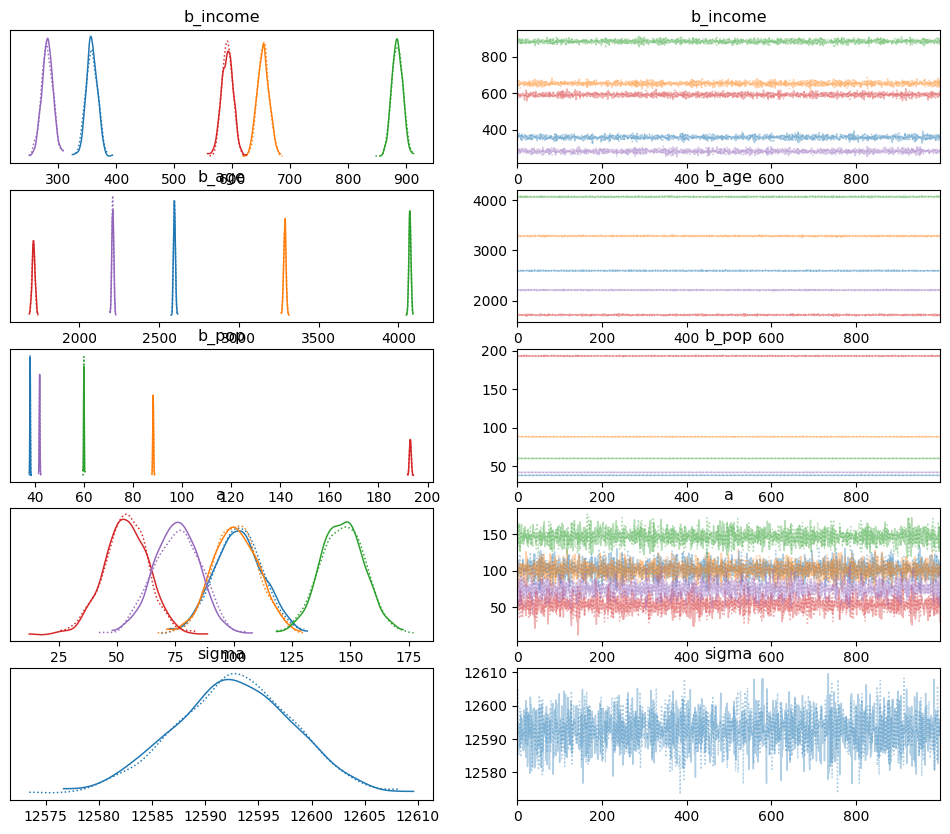

In [38]:
az.plot_trace(trace_4)

In [16]:
df_test = pd.read_csv("sample_data/california_housing_test.csv")
median_house_value_test = df_test["median_house_value"]
housing_median_age_test = df_test["housing_median_age"]
median_income_test = df_test["median_income"]
population_test = df_test["population"]

In [21]:
from sklearn.preprocessing import StandardScaler

features = df_test[['latitude', 'longitude', 'median_income']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

array([[ 0.81463305, -1.23372874,  1.51074547],
       [-0.64593087,  0.64634391, -0.11232419],
       [-0.87135553,  0.89200673,  1.0711495 ],
       ...,
       [ 0.31212392, -0.05554988, -0.81855768],
       [-0.72107242,  1.2379401 , -0.2893275 ],
       [-0.57078932, -0.02045519,  2.56365089]])

In [22]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df_test['cluster'] = clusters
df_test

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,1
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,3
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,3
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,4
...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,0


In [24]:
with hierarchical_model_4:
  pm.set_data({
      "m_i":median_income_test,
      "a_i":housing_median_age_test,
      "p_i":population_test,
      "y":median_house_value_test,
      "cluster":df_test["cluster"].values
  })
  trace_hm_4 = pm.sample_posterior_predictive(trace_4)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: xlabel='Y_obs / Y_obs'>], dtype=object)

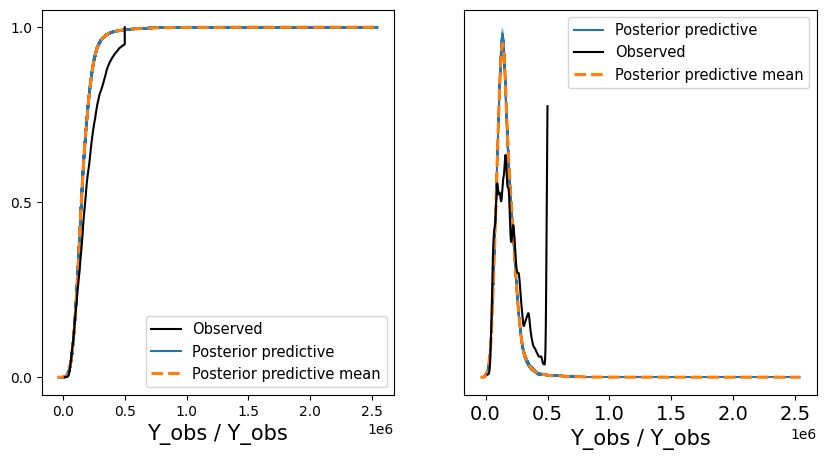

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_hm_4, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_hm_4, group='posterior', ax=axes[1])

In [ ]:
with hierarchical_model:
    pm.compute_log_likelihood(trace)

with hierarchical_model_2:
    pm.compute_log_likelihood(trace_2)

with hierarchical_model_3:
    pm.compute_log_likelihood(trace_3)

with hierarchical_model_4:
    pm.compute_log_likelihood(trace_4)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

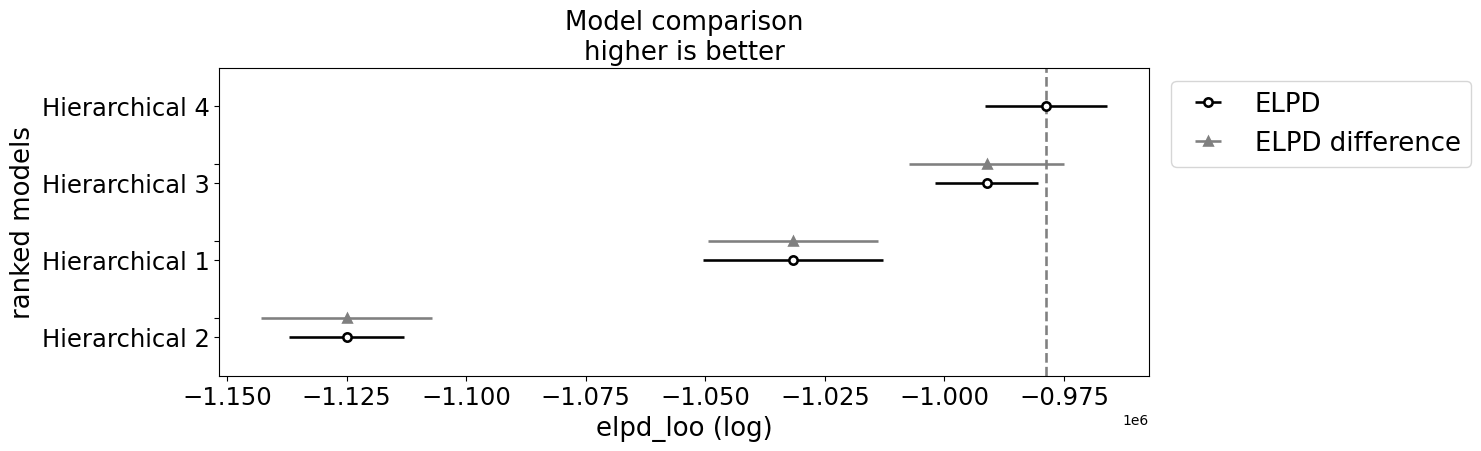

In [ ]:
model_compare = az.compare(
    {
        "Hierarchical 1": trace,
        "Hierarchical 2": trace_2,
        "Hierarchical 3": trace_3,
        "Hierarchical 4": trace_4,
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Hierarchical 4,0,-9.787945e+05,2564.236457,0.000000,0.821,12745.435849,0.000000,True,log
Hierarchical 3,1,-9.911932e+05,496.285590,12398.706506,0.179,10797.433699,16154.179371,True,log
Hierarchical 1,2,-1.031662e+06,177.669990,52867.822130,0.000,18867.946454,17839.428373,False,log
Hierarchical 2,3,-1.124981e+06,479.069027,146186.439014,0.000,12042.619180,17829.403691,False,log


In [25]:
trace_hm_4

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [28]:
preds = trace_hm_4.posterior_predictive["Y_obs"].mean(["chain","draw"]).to_numpy()
preds

array([228789.81243191, 143967.84972034, 335524.32910865, ...,
        52239.91408265, 107156.49963844, 224178.4456679 ])

In [31]:
df_test["preds"] = preds
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,preds
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,1,228789.812432
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,0,143967.849720
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,3,335524.329109
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,3,61462.788700
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,4,78597.768862
...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,0,107504.224160
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,0,204423.258175
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4,52239.914083
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,0,107156.499638


In [32]:

gdf_test = gpd.GeoDataFrame(df_test, geometry=gpd.points_from_xy(df_test.longitude, df_test.latitude))

gdf_test.crs = "EPSG:4326" #CRS = Coordinate Reference System


In [37]:
data = {'lon': gdf_test.geometry.x, 'lat': gdf_test.geometry.y, 'value': abs(gdf_test['median_house_value'] - gdf_test['preds'])}

p = ggplot(data) + \
    geom_livemap() + \
    geom_point(aes(x='lon', y='lat', size='value', color='value'), alpha=0.5) + \
    scale_color_gradient(low='blue', high='red') + \
    ggtitle('California median house value vs Predicted')

p.show()


# Exercícios

1) Use a técnica de regressão linear multinível vista para o dataset da aula2. Compare os modelos e analise o melhor de acordo com o ELPD LOO. Inclua, para efeito de comparação, um modelo de regressão linear que use o mesmo intercepto e inclinação para todos os dados. Use os mesmos preditores da aula 2.

2) Aplique a mesma técnica ao dataset abaixo e escolha o modelo de acordo com o ELPD LOO:

[Dataset do Tempo de Szeged no Kaggle](https://www.kaggle.com/datasets/budincsevity/szeged-weather)

Inclua também, para efeito de comparação, um modelo que não seja hierárquico.
